<a href="https://colab.research.google.com/github/lauraluebbert/transcriptomics-over-time/blob/main/transcriptomics_studies_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook generates plots showing the increase in studies using RNA-sequencing over time. 

Data sources (please cite):   
1. **Single-cell RNA-sequencing**  
Valentine Svensson, Eduardo da Veiga Beltrame, & Lior Pachter
Database, Volume 2020, 2020, baaa073; doi: 10.1093/database/baaa073  
Also see:  
https://www.nxn.se/single-cell-studies  
https://www.nxn.se/single-cell-studies/gui  

2. **Spatial transcriptomics**  
Moses, L., Pachter, L. Museum of spatial transcriptomics. Nat Methods 19, 534–546 (2022). https://doi.org/10.1038/s41592-022-01409-2

Note: The code for the some of the plots was adapted from [this notebook](https://github.com/pachterlab/kallistobustools/blob/master/docs/tutorials/scRNA-seq_intro/python/scRNA-seq_intro.ipynb) by [@sinabooeshaghi](https://github.com/sbooeshaghi/), which is part of the tutorials on the [kallistobus.tools](https://www.kallistobus.tools/) website: https://www.kallistobus.tools/tutorials/scrna-seq_intro/python/scrna-seq_intro/.
___

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mplcol
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from datetime import datetime

import colorsys
import plotnine as p
from mizani.breaks import date_breaks
from mizani.formatters import date_format

%config InlineBackend.figure_format = "retina"

In [2]:
# Make folder to save the plots in
!mkdir plots

___
# 1.  Single-cell RNA-sequencing (data from Svensson et al.)

Load data:

In [5]:
df.columns

Index(['Shorthand', 'DOI', 'Authors', 'Journal', 'Title', 'Publication date',
       'bioRxiv DOI', 'Reported cells total', 'Organism', 'Tissue',
       'Technique', 'Data location', 'Panel size', 'Measurement',
       'Cell source', 'Disease', 'Contrasts', 'Developmental stage',
       'Number of reported cell types or clusters', 'Cell clustering',
       'Pseudotime', 'RNA Velocity', 'PCA', 'tSNE', 'H5AD location',
       'Isolation', 'BC --> Cell ID _OR_ BC --> Cluster ID',
       'Number individuals'],
      dtype='object')

In [6]:
df = pd.read_csv("http://nxn.se/single-cell-studies/data.tsv", sep="\t")
# Convert date string to date format
df["Date"] = pd.to_datetime(df["Publication date"], format="%Y%m%d")
# Convert string of reported cells total to float
df["Reported cells total"] = df["Reported cells total"].str.replace(",", "").map(float)
df.head()

,Shorthand,DOI,Authors,Journal,Title,Publication date,bioRxiv DOI,Reported cells total,Organism,Tissue,...,Cell clustering,Pseudotime,RNA Velocity,PCA,tSNE,H5AD location,Isolation,BC --> Cell ID _OR_ BC --> Cluster ID,Number individuals,Date
0,Cauli et al PNAS,10.1073/pnas.97.11.6144,"B. Cauli, J. T. Porter, K. Tsuzuki, B. Lambole...",Proceedings of the National Academy of Sciences,Classification of fusiform neocortical interne...,20020726,-,85.0,Rat,Brain,...,Yes,No,No,Yes,No,NaN,Patch-clamp,NaN,NaN,2002-07-26
1,Malnic et al Cell,10.1016/S0092-8674(00)80581-4,"Bettina Malnic, Junzo Hirono, Takaaki Sato, Li...",Cell,Combinatorial Receptor Codes for Odors,20040410,-,18.0,Mouse,Brain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-04-10
2,Tietjen et al Neuron,10.1016/S0896-6273(03)00229-0,"Ian Tietjen, Jason M. Rihel, Yanxiang Cao, Geo...",Neuron,Single-Cell Transcriptional Analysis of Neuron...,20040415,-,37.0,"Human, Mouse",Brain,...,NaN,NaN,NaN,NaN,NaN,NaN,"Manual, LCM",NaN,NaN,2004-04-15
3,Gallopin et al CCortex,10.1093/cercor/bhj081,"Thierry Gallopin, Hélène Geoffroy, Jean Rossie...",Cerebral Cortex,"Cortical Sources of CRF, NKB, and CCK and Thei...",20051208,-,157.0,Rat,Brain,...,Yes,No,No,Yes,No,NaN,Patch-clamp,NaN,NaN,2005-12-08
4,Kurimoto et al NAR,10.1093/nar/gkl050,K. Kurimoto,Nucleic Acids Research,An improved single-cell cDNA amplification met...,20060330,-,20.0,Mouse,ICM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-30


Plot cumulative number of studies over time:

In [7]:
fontsize = 12

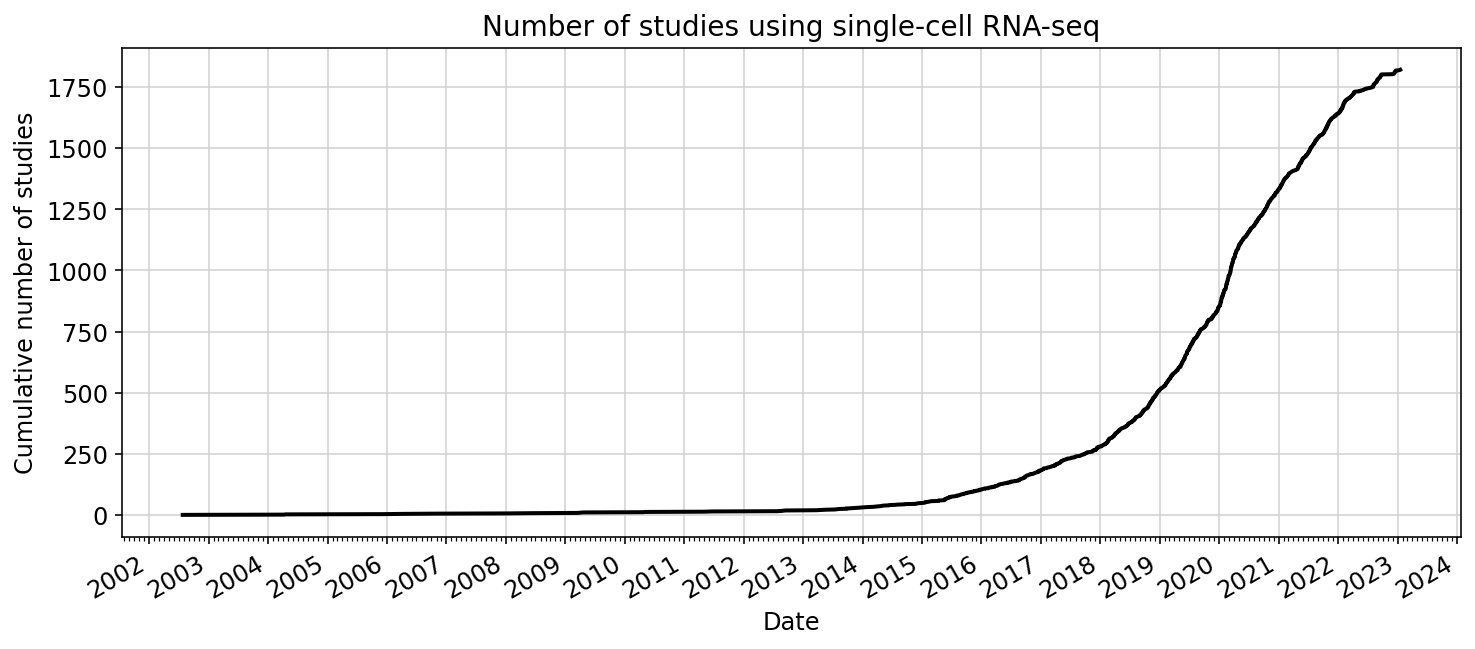

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get counts per date
df = df.sort_values("Date")
df["count"] = 1
x = df.Date
y = df["count"].groupby(df.Date.dt.time).cumsum()

ax.plot(x, y, lw=2, color="k")
ax.set_title("Number of studies using single-cell RNA-seq", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Cumulative number of studies", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

plt.savefig("./plots/sc_studies_over_time.png", bbox_inches='tight', dpi=300)

fig.show()

Plot number of cells sequenced over time:

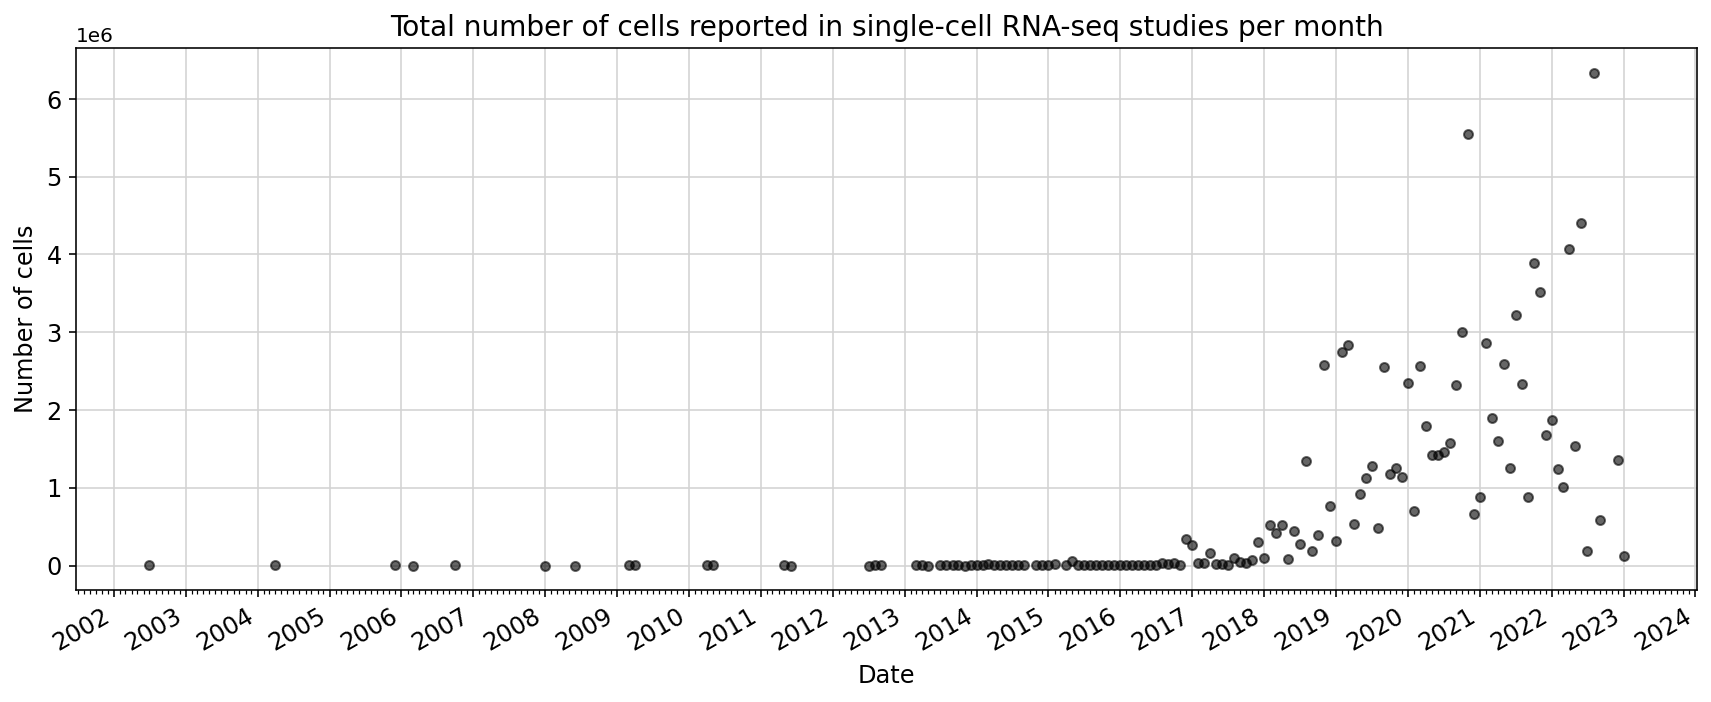

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get total cell counts per month per year
per_month_year = df.Date.dt.to_period("M")
x = df.groupby(per_month_year).sum().index.to_timestamp()
y = df.groupby(per_month_year).sum()["Reported cells total"].values

ax.scatter(x, y, s=20, color="k", alpha=0.6, edgecolors="k")
ax.set_title("Total number of cells reported in single-cell RNA-seq studies per month", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Number of cells", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig("./plots/sc_cells_over_time.png", bbox_inches='tight', dpi=300)

fig.show()

___
# 2. Spatial single-cell RNA-sequencing (data from Moses et al.)

In [10]:
# Google sheet ID
sheet_id = "1sJDb9B7AtYmfKv4-m8XR7uc3XXw_k4kGSout8cqZ8bY"
# Sheet tab ID
gid = "588531469"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&gid={gid}"

df_spatial = pd.read_csv(url)
# Format date column
df_spatial["date_published"] = pd.to_datetime(df_spatial["date_published"], format="%Y/%m/%d")
df_spatial.head()

,date_published,title,pmid,journal,URL,method,n_cells/bins/spots,n_genes,species,strain,...,city,institution,short_name,department,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,2014-10-23,Genome-wide RNA Tomography in the Zebrafish Em...,25417113.0,Cell,https://doi.org/10.1016/j.cell.2014.09.038,Tomo-seq,100.0,NaN,Danio rerio,TL,...,Utrecht,Hubrecht Institute,Hubrecht,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-23,Genome-wide RNA Tomography in the Zebrafish Em...,25417113.0,Cell,https://doi.org/10.1016/j.cell.2014.09.038,Tomo-seq,NaN,NaN,Danio rerio,TL,...,Utrecht,Hubrecht Institute,Hubrecht,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-23,Genome-wide RNA Tomography in the Zebrafish Em...,25417113.0,Cell,https://doi.org/10.1016/j.cell.2014.09.038,Tomo-seq,NaN,NaN,Mus musculus,WT,...,Utrecht,Hubrecht Institute,Hubrecht,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-23,Genome-wide RNA Tomography in the Zebrafish Em...,25417113.0,Cell,https://doi.org/10.1016/j.cell.2014.09.038,Tomo-seq,NaN,NaN,Mus musculus,Gli3-/-,...,Utrecht,Hubrecht Institute,Hubrecht,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-10-23,Genome-wide RNA Tomography in the Zebrafish Em...,25417113.0,Cell,https://doi.org/10.1016/j.cell.2014.09.038,Tomo-seq,NaN,NaN,Danio rerio,TL,...,Utrecht,Hubrecht Institute,Hubrecht,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot cumulative number of studies over time:

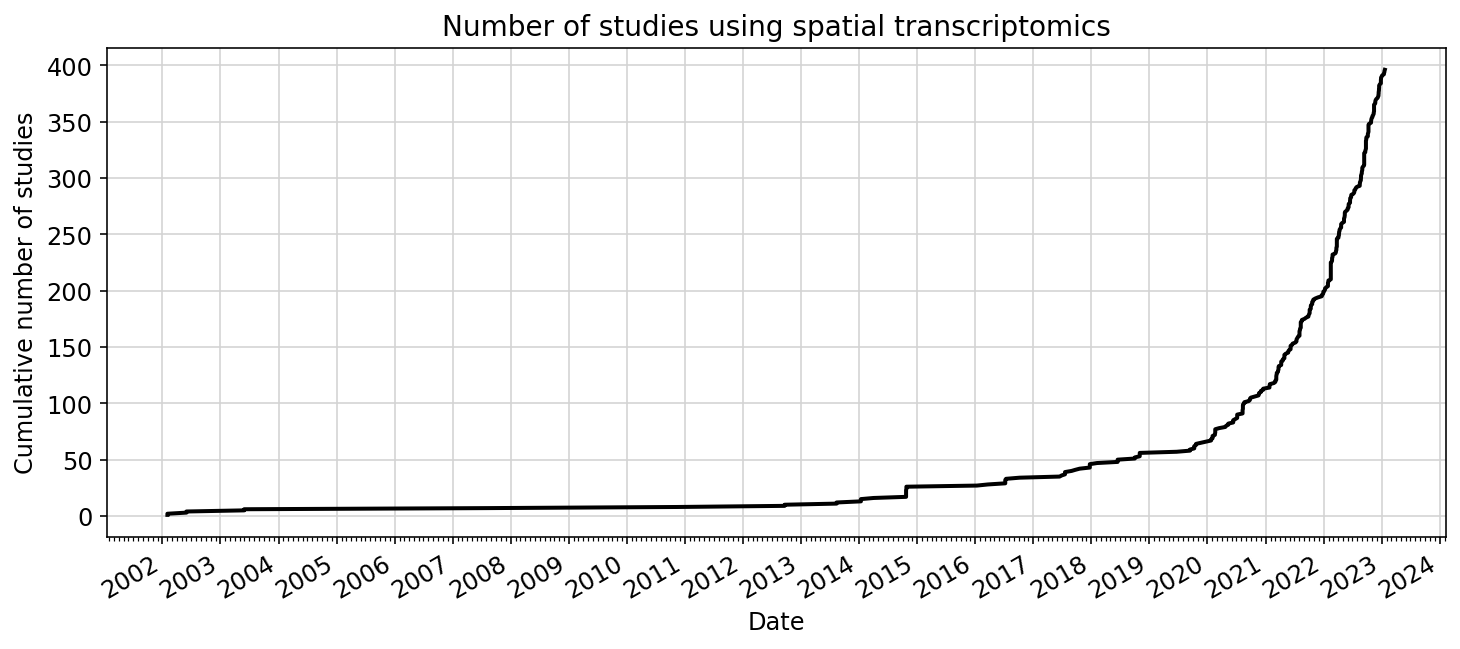

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get counts per date
df_spatial = df_spatial.sort_values("date_published")
df_spatial["count"] = 1
x = df_spatial.date_published
y = df_spatial["count"].groupby(df_spatial.date_published.dt.time).cumsum()

ax.plot(x, y, lw=2, color="k")
ax.set_title("Number of studies using spatial transcriptomics", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Cumulative number of studies", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

plt.savefig("./plots/spatial_studies_over_time.png", bbox_inches='tight', dpi=300)

fig.show()

Plot number of cells sequenced over time:

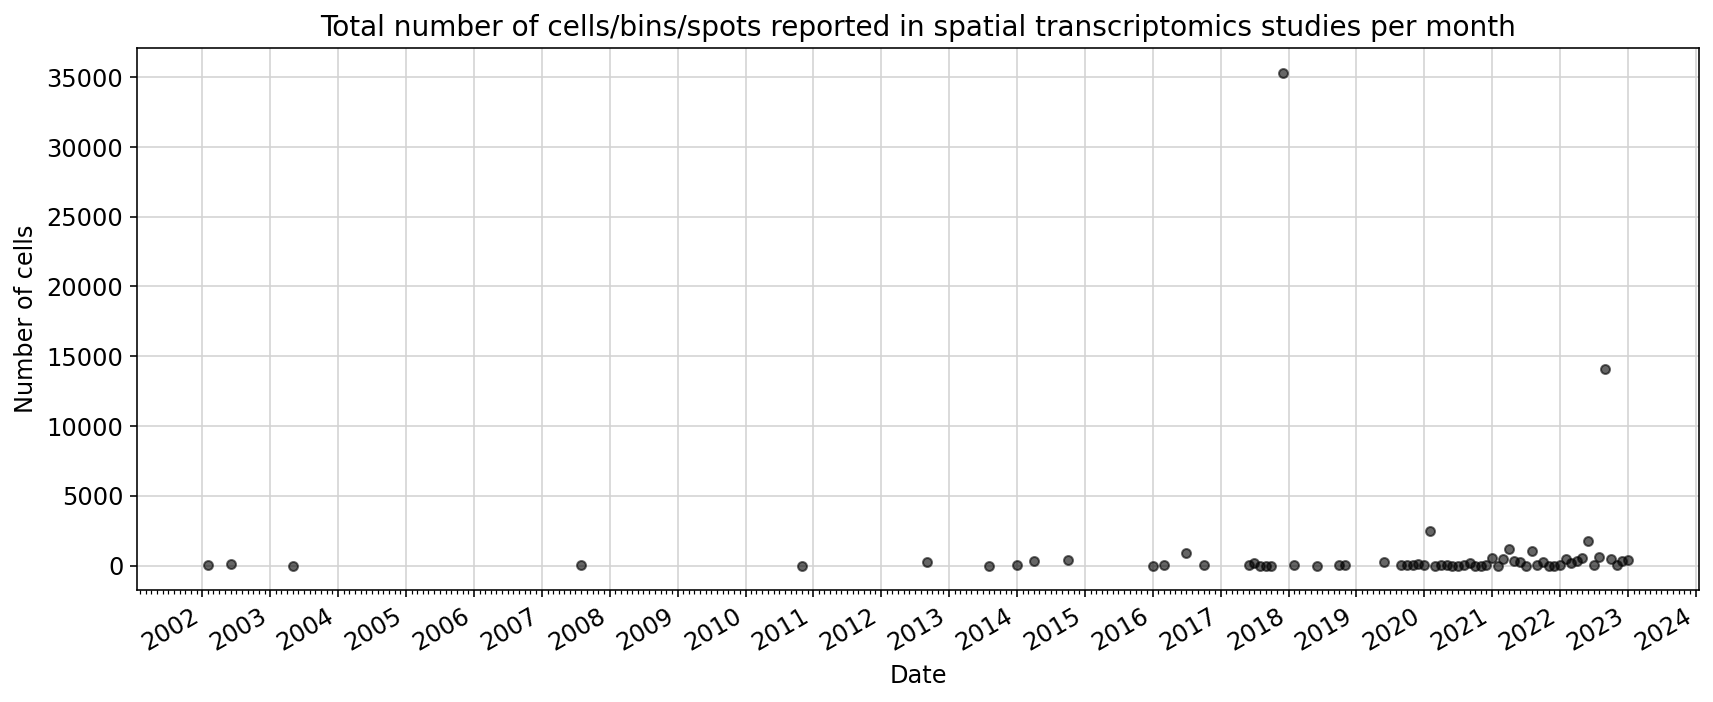

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get total cell counts per month per year
per_month_year = df_spatial.date_published.dt.to_period("M")
x = df_spatial.groupby(per_month_year).sum().index.to_timestamp()
y = df_spatial.groupby(per_month_year).sum()["n_cells/bins/spots"].values

ax.scatter(x, y, s=20, color="k", alpha=0.6, edgecolors="k")
ax.set_title("Total number of cells/bins/spots reported in spatial transcriptomics studies per month", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Number of cells", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig("./plots/spatial_cells_over_time.png", bbox_inches='tight', dpi=300)

fig.show()

___
# Combined plots

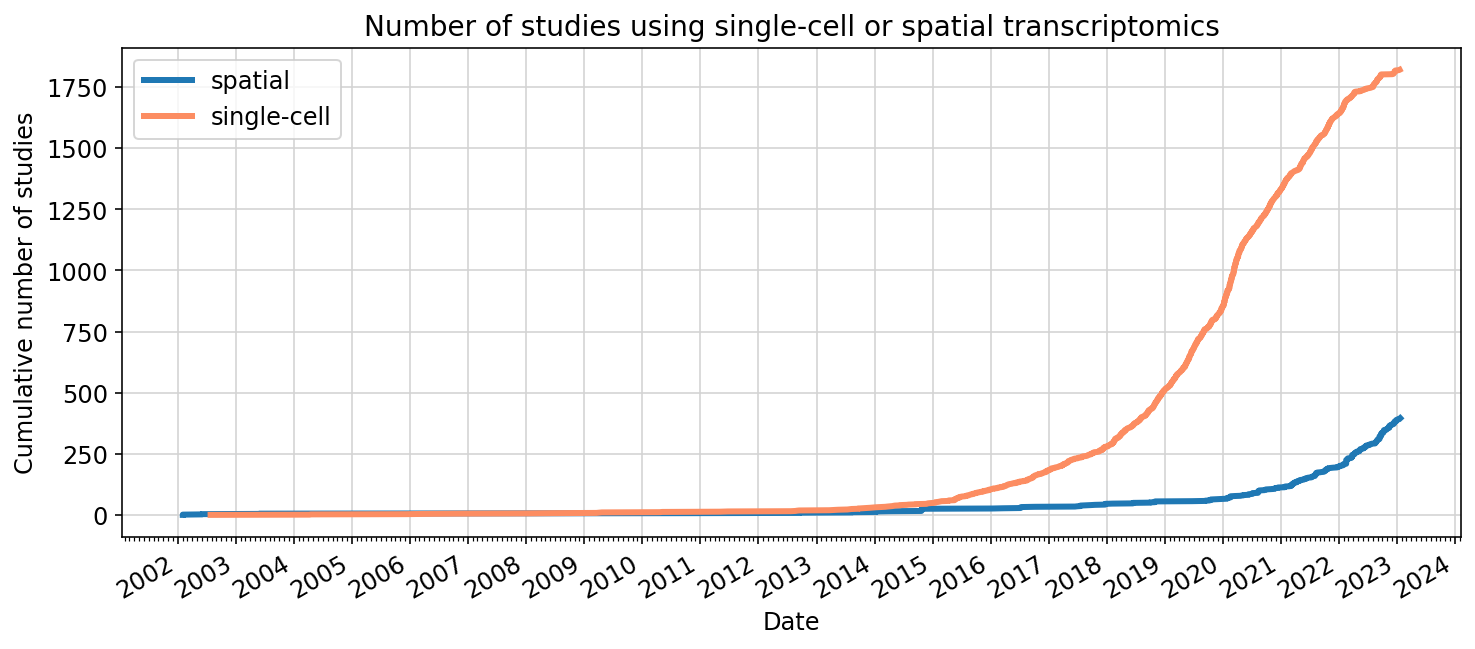

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get counts per date
x1 = df_spatial.date_published
y1 = df_spatial["count"].groupby(df_spatial.date_published.dt.time).cumsum()
ax.plot(x1, y1, lw=3, color="#1f78b4", label="spatial")

x2 = df.Date
y2 = df["count"].groupby(df.Date.dt.time).cumsum()
ax.plot(x2, y2, lw=3, color="#fc8d62", label="single-cell")

ax.set_title("Number of studies using single-cell or spatial transcriptomics", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Cumulative number of studies", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

ax.legend(fontsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

plt.savefig("./plots/studies_over_time.png", bbox_inches='tight', dpi=300)

fig.show()

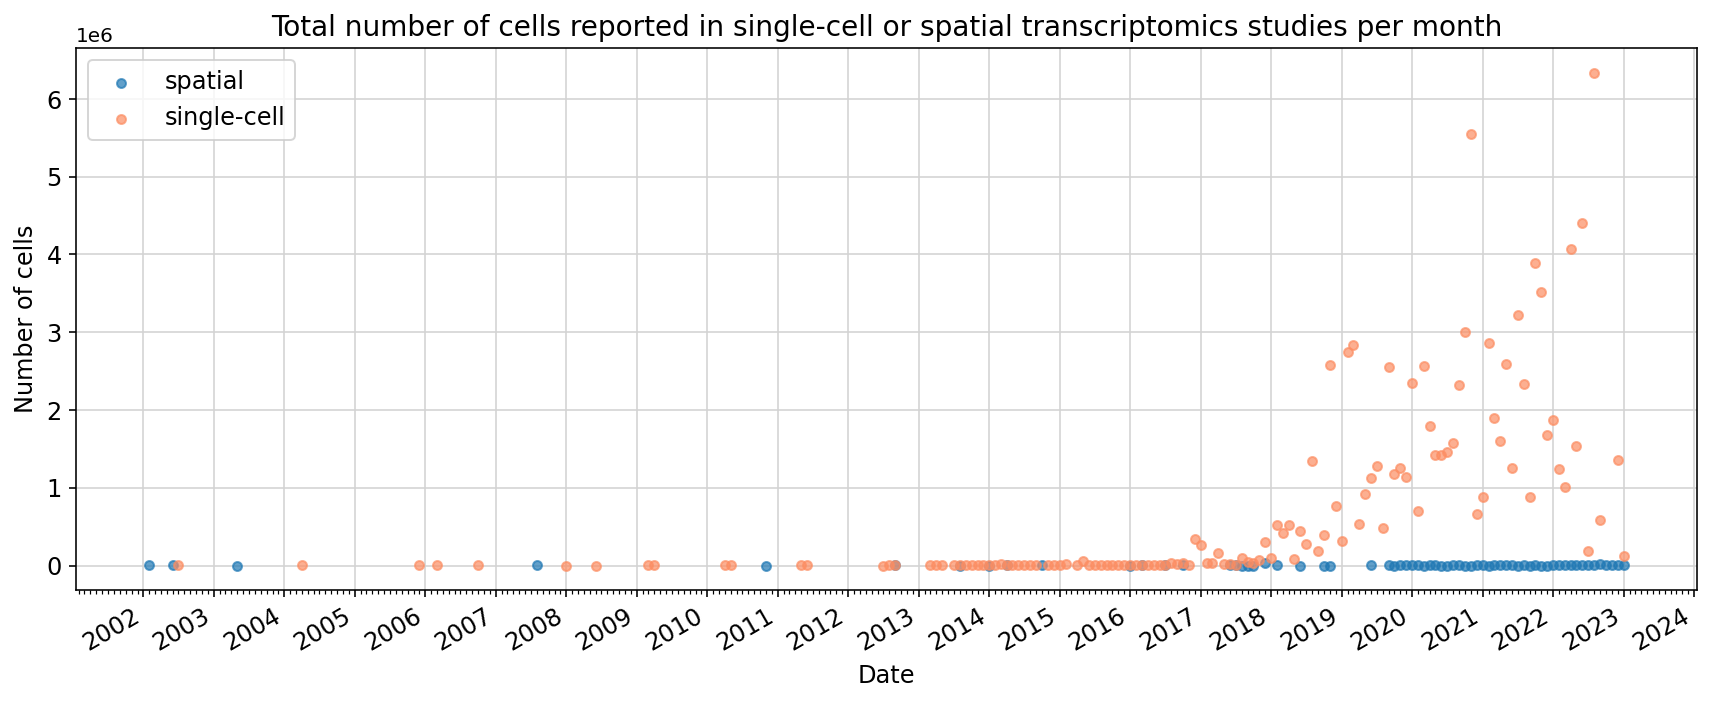

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

# Get total cell counts per month per year
per_month_year = df_spatial.date_published.dt.to_period("M")
x = df_spatial.groupby(per_month_year).sum().index.to_timestamp()
y = df_spatial.groupby(per_month_year).sum()["n_cells/bins/spots"].values
ax.scatter(x, y, s=20, color="#1f78b4", label="spatial", alpha=0.7, edgecolors="#1f78b4")

per_month_year2 = df.Date.dt.to_period("M")
x2 = df.groupby(per_month_year2).sum().index.to_timestamp()
y2 = df.groupby(per_month_year2).sum()["Reported cells total"].values
ax.scatter(x2, y2, s=20, color="#fc8d62", label="single-cell", alpha=0.7, edgecolors="#fc8d62")

ax.set_title("Total number of cells reported in single-cell or spatial transcriptomics studies per month", fontsize=fontsize+2)
ax.set_xlabel("Date", fontsize=fontsize)
ax.set_ylabel("Number of cells", fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

# Format the x ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
fig.autofmt_xdate()

# Add grid and set below graph
ax.grid(True, which="major", color="lightgray")
ax.set_axisbelow(True)

ax.legend(fontsize=fontsize)

plt.tight_layout()
plt.savefig("./plots/cells_over_time.png", bbox_inches='tight', dpi=300)

fig.show()